Ce notebook reprend le cours n°1 sur les tendances de abcbouse dont le lien vers la page est juste en dessous. Il est intéressant d'ouvrir le lien et de lirre la page avant de lancer les codes afin
de mieux saisir les concepts de base
https://www.abcbourse.com/apprendre/11_lecon1.html

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from scipy.signal import argrelextrema
from datetime import date 

In [12]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies' 
df = pd.read_html(url, header=0)[0]
liste_tickers = df['Symbol'].to_list()

In [13]:
aujourdhui = date.today()
date_formatee = aujourdhui.strftime("%Y-%m-%d") 
date_formatee

symbole = 'GOOGL'

ticker = yf.Ticker(symbole)
data = ticker.history(start='2023-06-27',
                     end=date_formatee)

data = data[['Close']]

### Tracer une bande de résistance 

In [5]:
aujourdhui = date.today()
date_formatee = aujourdhui.strftime("%Y-%m-%d") # on met au bon format la date pour qu'elle soit exploitable dans la suite du code 
date_formatee

symbole = 'GOOGL'  

ticker = yf.Ticker(symbole) 

data = ticker.history(start='2023-06-27',
                     end=date_formatee)  

data = data[['Close']]

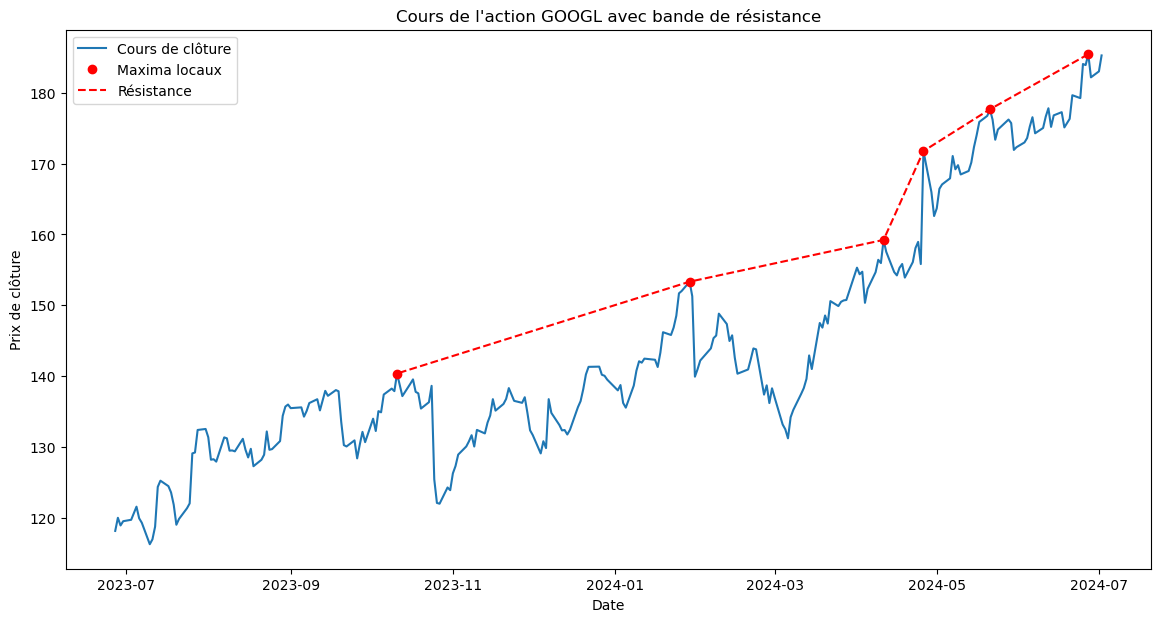

In [6]:
n = 10  
local_max = argrelextrema(data['Close'].values, np.greater, order=n)[0]
selected_max = data['Close'].iloc[local_max].nlargest(6)

plt.figure(figsize=(14, 7)) 
plt.plot(data.index, data['Close'], label='Cours de clôture') 
plt.plot(selected_max.index, selected_max.values, 'ro', label='Maxima locaux') 
plt.plot(selected_max.index, selected_max.values, 'r--', label='Résistance')

plt.title(f'Cours de l\'action {ticker.ticker} avec bande de résistance')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

### Tous les points sont reliés sur le graphique du dessus mais on aimerait plutôt avoir 2 bandes de résistances distinctes alors nous allons séparer dans le code qui suit les 3 points qui permettront d'obtenir la bande de résistance de gauche et les 3 points qui permettront d'obtenir la bande de résistance de droite

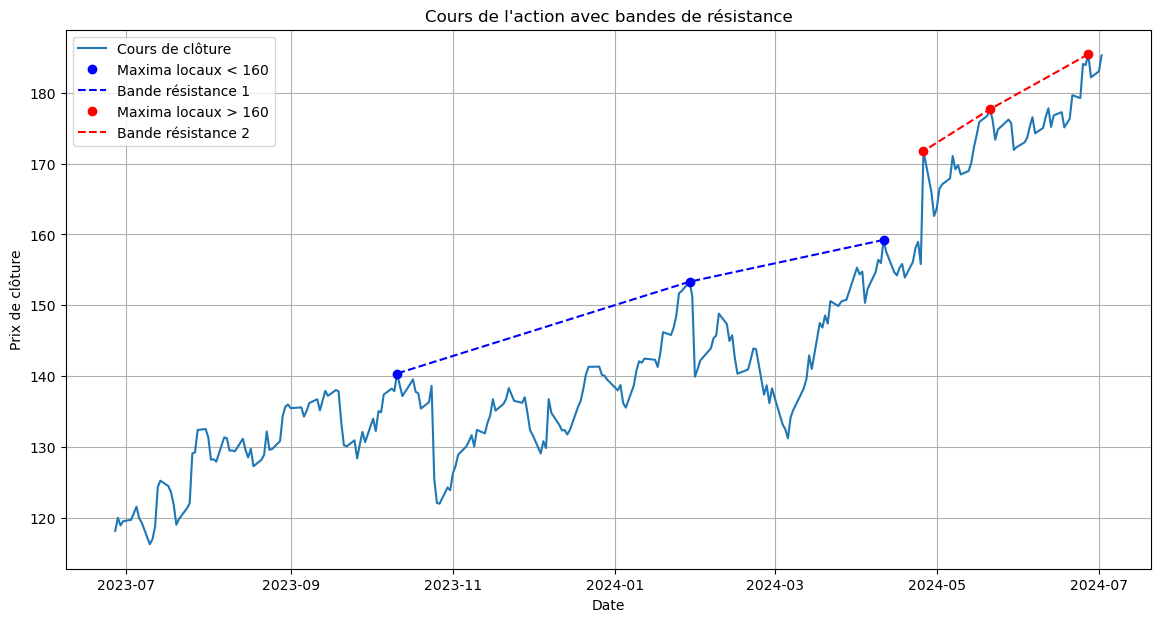

In [7]:
max_locaux1 = pd.Series()
max_locaux2 = pd.Series()

for index, valeur in selected_max.items():
    if valeur < 160:
        max_locaux1.at[index] = valeur
    else:
        max_locaux2.at[index] = valeur

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Cours de clôture')
plt.plot(max_locaux1.index, max_locaux1.values, 'bo', label='Maxima locaux < 160')
plt.plot(max_locaux1.index, max_locaux1.values, linestyle= '--', color='blue', label='Bande résistance 1')
plt.plot(max_locaux2.index, max_locaux2.values, 'ro', label='Maxima locaux > 160')
plt.plot(max_locaux2.index, max_locaux2.values, linestyle= '--',  color='red', label='Bande résistance 2')


plt.title('Cours de l\'action avec bandes de résistance')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.grid(True) 
plt.show() 

### Plus qu'à tout reprendre avec les min locaux pour tracer le support

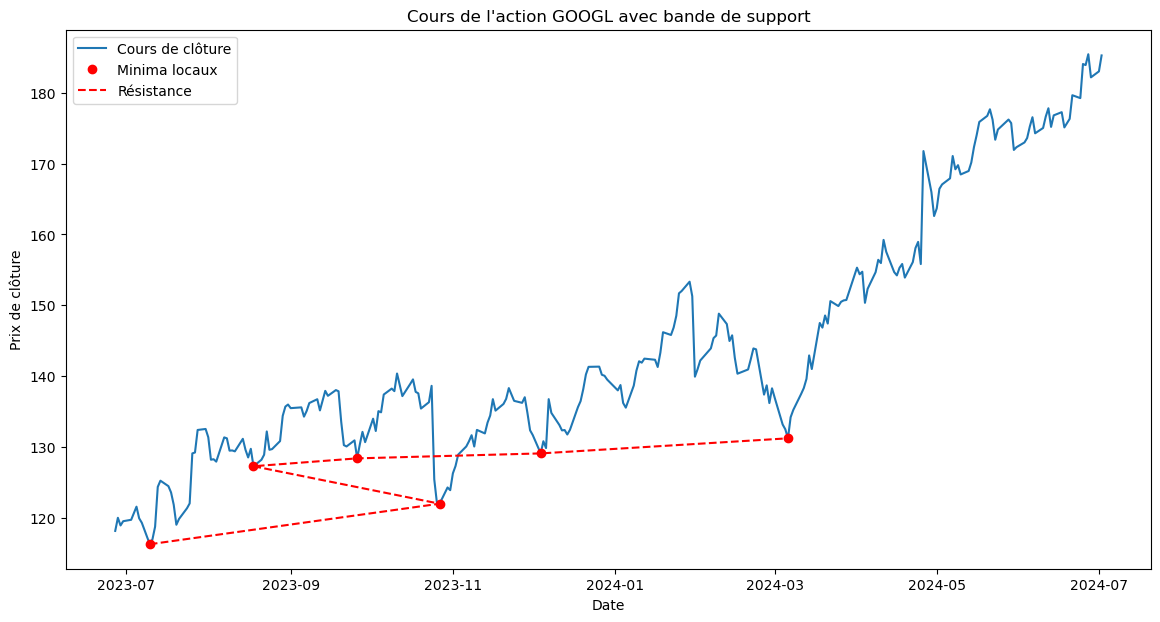

In [8]:
n = 15  
local_min = argrelextrema(data['Close'].values, np.less, order=n)[0]
selected_min = data['Close'].iloc[local_min].nsmallest(6)

plt.figure(figsize=(14, 7)) 
plt.plot(data.index, data['Close'], label='Cours de clôture') 
plt.plot(selected_min.index, selected_min.values, 'ro', label='Minima locaux') 
plt.plot(selected_min.index, selected_min.values, 'r--', label='Résistance')

plt.title(f'Cours de l\'action {ticker.ticker} avec bande de support')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

In [9]:
selected_min = selected_min.sort_index()

points_bande_support = pd.Series()

for index, valeur in selected_min.items():
    if str(index) in ['2023-07-10 00:00:00-04:00', '2023-10-27 00:00:00-04:00', '2024-03-06 00:00:00-05:00']:
        points_bande_support.at[index] = valeur

print(points_bande_support)

2023-07-10 00:00:00-04:00    116.316498
2023-10-27 00:00:00-04:00    122.029945
2024-03-06 00:00:00-05:00    131.249359
dtype: float64


### à présent on a notre liste avec les 3 points de la bande support, il est temps de tracer cette bande stratégique

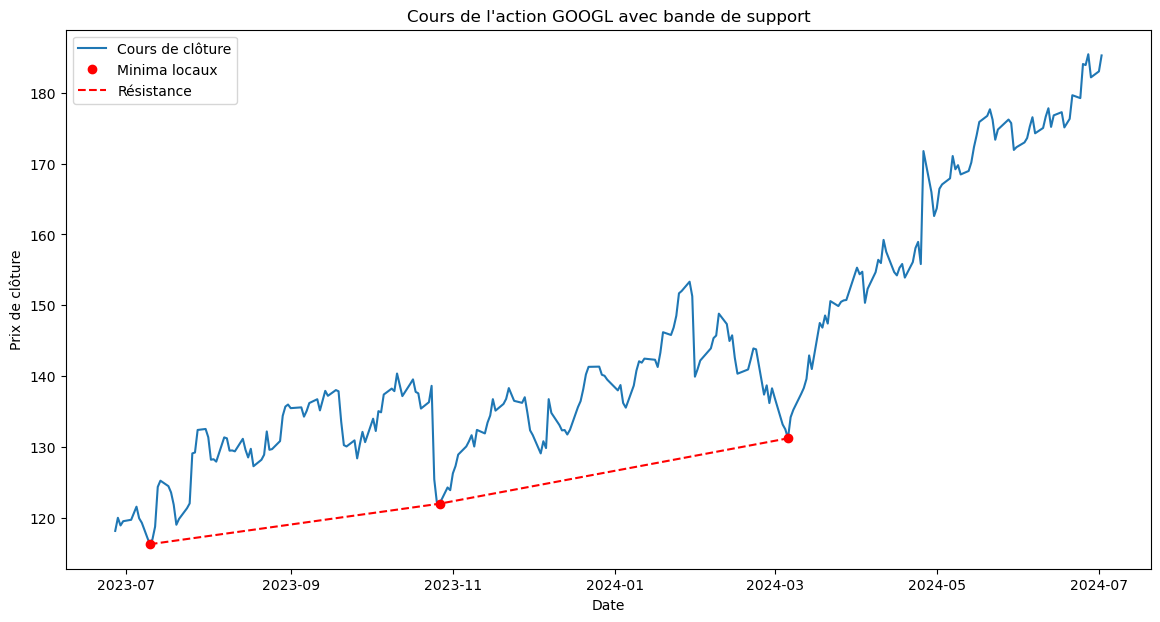

In [10]:
plt.figure(figsize=(14, 7)) 
plt.plot(data.index, data['Close'], label='Cours de clôture') 
plt.plot(points_bande_support.index, points_bande_support.values, 'ro', label='Minima locaux') 
plt.plot(points_bande_support.index, points_bande_support.values, 'r--', label='Résistance')

plt.title(f'Cours de l\'action {ticker.ticker} avec bande de support')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

### Il nous reste à tout rassembler sur un seul et même graphique

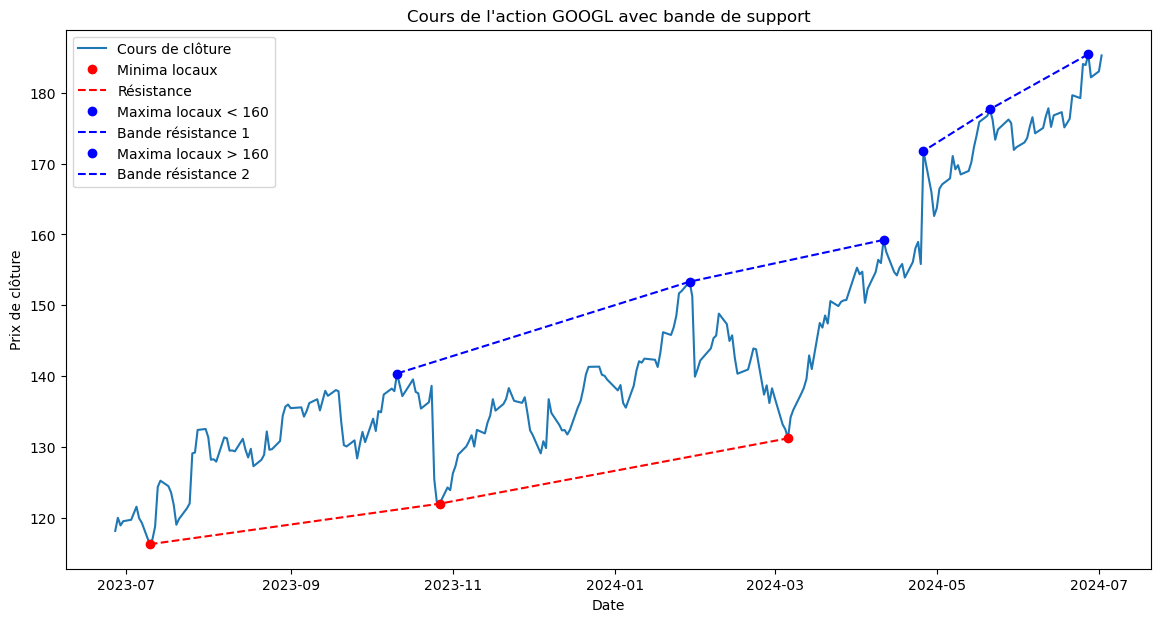

In [11]:
plt.figure(figsize=(14, 7)) 
plt.plot(data.index, data['Close'], label='Cours de clôture') 

plt.plot(points_bande_support.index, points_bande_support.values, 'ro', label='Minima locaux') 
plt.plot(points_bande_support.index, points_bande_support.values, 'r--', label='Résistance')
plt.plot(max_locaux1.index, max_locaux1.values, 'bo', label='Maxima locaux < 160')
plt.plot(max_locaux1.index, max_locaux1.values, linestyle= '--', color='blue', label='Bande résistance 1')
plt.plot(max_locaux2.index, max_locaux2.values, 'bo', label='Maxima locaux > 160')
plt.plot(max_locaux2.index, max_locaux2.values, linestyle= '--',  color='blue', label='Bande résistance 2')

plt.title(f'Cours de l\'action {ticker.ticker} avec bande de support')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()